## ***GENDER CLASSSIFICATION ON THE BASIS OF WEIGHT AND HEIGHT***
:::::


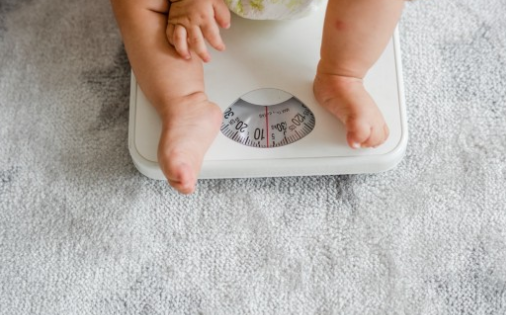


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
wh = pd.read_csv('/content/weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
wh.shape


(10000, 3)

In [ ]:
print('Our Data has {} samples.'.format(wh.shape[0]))

Our Data has 10000 samples.


In [ ]:
wh.isnull().sum().sum()

0

In [ ]:
print(wh.describe())

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


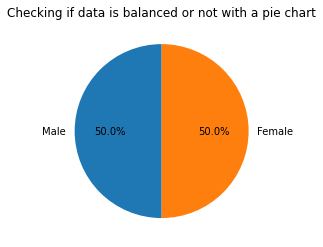

In [ ]:
labels =wh.Gender.unique()
sizes = [(wh.Gender == labels[0]).sum(), (wh.Gender == labels[1]).sum()]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Checking if data is balanced or not with a pie chart")
plt.show()

<Figure size 720x576 with 0 Axes>

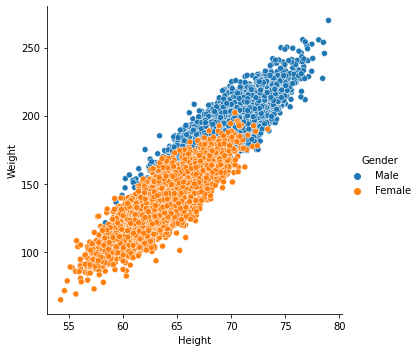

In [ ]:
plt.figure(figsize = (10, 8))
sb.relplot(x = 'Height', y = 'Weight', data = wh, hue = 'Gender')
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = wh.iloc[:, [1, 2]].values
y = wh.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [ ]:
clf.score(X_train, y_train)

0.9147142857142857

In [ ]:
clf.score(X_test, y_test)

0.919

In [ ]:
clf.predict_proba([[175, 84]])

array([[0.40299528, 0.59700472]])

In [ ]:
#Making a prediction for a user
height = 175
weight = 84
prediction = clf.predict([[height, weight]])
print("The classifier predicts that you are " +str(prediction[0]))

The classifier predicts that you are Male


Well. It predicted my gender correctly. You could give it a try.


<h2>Limitations</h2>
* This is a very basic model that is prediciting gender based on only 2 variables. Other factors such as age, nationality/race can be important too.